In [4]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Simple plot settings without using styles
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# Load the 1G version first (smallest)
try:
    print("Loading dataset...")
    dataset = load_dataset("thuml/UTSD", 'UTSD-1G')
    
    print("Dataset Structure:")
    print(dataset)
    
    # Look at the keys/structure
    print("\nAvailable keys:")
    print(list(dataset.keys()))
    
    # Get info about the first split
    print("\nFirst split info:")
    print(dataset['train'].info())
    
    # Look at first few rows
    print("\nFirst few rows:")
    print(dataset['train'][:2])

except Exception as e:
    print(f"Error loading dataset: {str(e)}")
    print("\nError details:", e.__class__.__name__)

Loading dataset...


To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 68679 examples [00:00, 106067.24 examples/s]

Dataset Structure:
DatasetDict({
    train: Dataset({
        features: ['item_id', 'start', 'end', 'freq', 'target'],
        num_rows: 68679
    })
})

Available keys:
['train']

First split info:
Error loading dataset: 'DatasetInfo' object is not callable

Error details: TypeError


In [5]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

# Simple plot settings
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

# Load and explore dataset
try:
    print("Loading dataset...")
    dataset = load_dataset("thuml/UTSD", 'UTSD-1G')
    
    # Get the train dataset
    train_data = dataset['train']
    
    # Look at the features
    print("\nFeatures available:")
    print(train_data.features)
    
    # Look at some sample data
    print("\nFirst 2 rows:")
    print(train_data[:2])
    
    # Basic statistics
    print("\nDataset size:")
    print(f"Number of rows: {len(train_data)}")
    
    # Look at unique values in categorical columns
    print("\nUnique frequencies:")
    freqs = set(train_data['freq'])
    print(freqs)
    
    # Look at a sample time series
    first_series = train_data[0]
    print("\nFirst time series example:")
    print(f"ID: {first_series['item_id']}")
    print(f"Start: {first_series['start']}")
    print(f"End: {first_series['end']}")
    print(f"Frequency: {first_series['freq']}")
    print(f"Target shape: {np.array(first_series['target']).shape}")

except Exception as e:
    print(f"Error: {str(e)}")
    print("Error type:", type(e))
    import traceback
    traceback.print_exc()

Loading dataset...

Features available:
{'item_id': Value(dtype='string', id=None), 'start': Value(dtype='string', id=None), 'end': Value(dtype='string', id=None), 'freq': Value(dtype='string', id=None), 'target': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None)}

First 2 rows:
{'item_id': ['Health_SelfRegulationSCP1_458_0', 'Health_SelfRegulationSCP1_458_1'], 'start': ['', ''], 'end': ['', ''], 'freq': ['', ''], 'target': [[-8.119999885559082, -11.5600004196167, -14.279999732971191, -18.190000534057617, -20.030000686645508, -20.84000015258789, -20.09000015258789, -19.5, -18.059999465942383, -17.25, -18.34000015258789, -17.40999984741211, -18.719999313354492, -19.8799991607666, -19.3799991607666, -19.719999313354492, -19.34000015258789, -17.780000686645508, -16.40999984741211, -17.3799991607666, -15.970000267028809, -16.969999313354492, -18.34000015258789, -20.969999313354492, -23.219999313354492, -26.90999984741211, -28.219999313354492, -28.940000534057617, -30.84

In [6]:
dataset = load_dataset("thuml/UTSD", 'UTSD-1G')  # Loading smallest version


In [11]:
from datasets import load_dataset
from collections import defaultdict
import pandas as pd

def analyze_utsd_composition():
    """
    Analyze the composition of the UTSD-1G dataset to understand domains and datasets present.
    """
    # Load the dataset with correct path
    dataset = load_dataset("thuml/UTSD", 'UTSD-1G')
    
    # Initialize containers for analysis
    domain_counts = defaultdict(int)
    dataset_details = defaultdict(lambda: {
        'count': 0,
        'freq': set(),
        'avg_length': 0,
        'total_points': 0,
        'sample_ids': []  # Store some sample IDs for reference
    })
    
    # Analyze each series
    for series in dataset['train']:
        # Extract domain and specific dataset name
        item_parts = series['item_id'].split('_')
        domain = item_parts[0]
        dataset_name = '_'.join(item_parts[:-1])  # Everything except the last part
        
        # Update counts
        domain_counts[domain] += 1
        dataset_details[dataset_name]['count'] += 1
        dataset_details[dataset_name]['freq'].add(series['freq'])
        series_length = len(series['target'])
        dataset_details[dataset_name]['total_points'] += series_length
        
        # Store sample IDs (up to 3 per dataset)
        if len(dataset_details[dataset_name]['sample_ids']) < 3:
            dataset_details[dataset_name]['sample_ids'].append(series['item_id'])
    
    # Calculate averages and prepare output
    for dataset_name in dataset_details:
        total_series = dataset_details[dataset_name]['count']
        dataset_details[dataset_name]['avg_length'] = (
            dataset_details[dataset_name]['total_points'] / total_series
        )
        dataset_details[dataset_name]['freq'] = list(dataset_details[dataset_name]['freq'])
    
    # Convert to pandas DataFrames for better visualization
    domain_df = pd.DataFrame({
        'Domain': domain_counts.keys(),
        'Number of Series': domain_counts.values()
    }).sort_values('Number of Series', ascending=False)
    
    dataset_df = pd.DataFrame([
        {
            'Dataset': name,
            'Domain': name.split('_')[0],
            'Number of Series': details['count'],
            'Average Length': int(details['avg_length']),
            'Total Points': details['total_points'],
            'Frequency': ', '.join(details['freq']),
            'Sample IDs': ', '.join(details['sample_ids'][:3])
        }
        for name, details in dataset_details.items()
    ]).sort_values('Number of Series', ascending=False)
    
    return domain_df, dataset_df

# Function to get quick stats about a series
def get_series_stats(dataset, series_id):
    """Get basic statistics for a specific series."""
    series = next((s for s in dataset['train'] if s['item_id'] == series_id), None)
    if series:
        return {
            'id': series_id,
            'frequency': series['freq'],
            'length': len(series['target']),
            'min': min(series['target']),
            'max': max(series['target']),
            'mean': sum(series['target']) / len(series['target'])
        }
    return None

In [12]:
# Load and analyze
dataset = load_dataset("thuml/UTSD", 'UTSD-1G')
domain_df, dataset_df = analyze_utsd_composition()

# Print summaries
print("=== Domains in UTSD-1G ===")
print(domain_df)
print("\n=== Detailed Dataset Information ===")
print(dataset_df)

# Get example series stats
if len(dataset['train']) > 0:
    first_series = dataset['train'][0]
    stats = get_series_stats(dataset, first_series['item_id'])
    print("\n=== Example Series Statistics ===")
    print(stats)

=== Domains in UTSD-1G ===
        Domain  Number of Series
3       Nature             35013
0       Health             18865
2          Web             14505
4         ERA5               108
7    Transport                66
6       Energy                66
1          IoT                36
5  Environment                20

=== Detailed Dataset Information ===
                                                Dataset     Domain  \
4283  Nature_temperature_rain_dataset_without_missin...     Nature   
1643  Web_kaggle_web_traffic_dataset_without_missing...        Web   
561                                  Health_BIDMC32HR_0     Health   
566                                    Health_IEEEPPG_5     Health   
571                                    Health_IEEEPPG_6     Health   
...                                                 ...        ...   
4469             Transport_pedestrian_counts_dataset_39  Transport   
4470             Transport_pedestrian_counts_dataset_38  Transport   
4471    

In [13]:
import pandas as pd
import numpy as np
from datasets import load_dataset
from typing import Dict, List, Optional, Tuple
from dataclasses import dataclass
from sklearn.preprocessing import StandardScaler

@dataclass
class DomainInfo:
    """Store metadata about each domain"""
    name: str
    frequency: str
    total_series: int
    avg_length: float
    min_length: int
    max_length: int
    frequencies: set

class UTSDLoader:
    """
    Unified loader for all domains in UTSD dataset with preprocessing capabilities
    """
    def __init__(self, version: str = 'UTSD-1G'):
        self.version = version
        self.dataset = load_dataset("thuml/UTSD", version)
        self.domain_info = {}
        self.scalers = {}
        self._analyze_domains()

    def _analyze_domains(self) -> None:
        """Analyze and store information about each domain"""
        domain_data = {}
        
        for series in self.dataset['train']:
            domain = series['item_id'].split('_')[0]
            
            if domain not in domain_data:
                domain_data[domain] = {
                    'counts': 0,
                    'total_length': 0,
                    'lengths': [],
                    'frequencies': set()
                }
            
            length = len(series['target'])
            domain_data[domain]['counts'] += 1
            domain_data[domain]['total_length'] += length
            domain_data[domain]['lengths'].append(length)
            domain_data[domain]['frequencies'].add(series['freq'])
        
        # Create DomainInfo objects
        for domain, data in domain_data.items():
            self.domain_info[domain] = DomainInfo(
                name=domain,
                frequency=max(data['frequencies']) if data['frequencies'] else '',
                total_series=data['counts'],
                avg_length=data['total_length'] / data['counts'],
                min_length=min(data['lengths']),
                max_length=max(data['lengths']),
                frequencies=data['frequencies']
            )

    def get_domain_series(self, domain: str) -> List[Dict]:
        """Get all series from a specific domain"""
        return [s for s in self.dataset['train'] if s['item_id'].split('_')[0] == domain]

    def prepare_sequence_data(self, 
                            series: List[float], 
                            sequence_length: int, 
                            prediction_length: int) -> Tuple[np.ndarray, np.ndarray]:
        """Convert a series into sequences for training"""
        data = []
        targets = []
        
        for i in range(len(series) - sequence_length - prediction_length + 1):
            data.append(series[i:(i + sequence_length)])
            targets.append(series[(i + sequence_length):(i + sequence_length + prediction_length)])
        
        return np.array(data), np.array(targets)

    def get_training_data(self, 
                         domain: str, 
                         sequence_length: int = 100, 
                         prediction_length: int = 1,
                         max_samples: Optional[int] = None,
                         normalize: bool = True) -> Tuple[np.ndarray, np.ndarray]:
        """
        Get preprocessed training data for a specific domain
        
        Args:
            domain: Domain name
            sequence_length: Length of input sequences
            prediction_length: Length of prediction horizon
            max_samples: Maximum number of series to process
            normalize: Whether to normalize the data
        """
        series_list = self.get_domain_series(domain)
        if max_samples:
            series_list = series_list[:max_samples]
        
        all_sequences = []
        all_targets = []
        
        for series_dict in series_list:
            series = series_dict['target']
            
            if normalize:
                if series_dict['item_id'] not in self.scalers:
                    scaler = StandardScaler()
                    series = scaler.fit_transform(np.array(series).reshape(-1, 1)).flatten()
                    self.scalers[series_dict['item_id']] = scaler
                else:
                    series = self.scalers[series_dict['item_id']].transform(
                        np.array(series).reshape(-1, 1)
                    ).flatten()
            
            if len(series) >= sequence_length + prediction_length:
                X, y = self.prepare_sequence_data(series, sequence_length, prediction_length)
                all_sequences.append(X)
                all_targets.append(y)
        
        return (np.concatenate(all_sequences, axis=0), 
                np.concatenate(all_targets, axis=0))

    def get_domain_summary(self) -> pd.DataFrame:
        """Get a summary of all domains"""
        summaries = []
        for domain, info in self.domain_info.items():
            summaries.append({
                'Domain': domain,
                'Total Series': info.total_series,
                'Avg Length': int(info.avg_length),
                'Min Length': info.min_length,
                'Max Length': info.max_length,
                'Frequencies': ', '.join(info.frequencies) if info.frequencies else 'None'
            })
        return pd.DataFrame(summaries)

    def get_domain_sample(self, domain: str, n_samples: int = 3) -> Dict:
        """Get sample series from a domain for quick analysis"""
        series_list = self.get_domain_series(domain)[:n_samples]
        return {s['item_id']: np.array(s['target']) for s in series_list}

In [14]:
# Initialize loader
loader = UTSDLoader('UTSD-1G')

# See summary of all domains
print(loader.get_domain_summary())

# Example: prepare data for one domain
X_health, y_health = loader.get_training_data('Health', 
                                            sequence_length=50,
                                            prediction_length=10,
                                            max_samples=100)

# Get samples from each domain
for domain in loader.domain_info.keys():
    samples = loader.get_domain_sample(domain)
    print(f"\n{domain} samples:", len(samples))

        Domain  Total Series  Avg Length  Min Length  Max Length Frequencies
0       Health         18865        1448         640        4000            
1          IoT            36      180139      180139      180140            
2          Web         14505         803         803         803           D
3       Nature         35013         973         725       73924      , H, D
4         ERA5           108      116880      116880      116880           H
5  Environment            20     1005339      407184     3846408     , MS, S
6       Energy            66       96750       10656     3698573        S, M
7    Transport            66       47459         576       96424           H

Health samples: 3

IoT samples: 3

Web samples: 3

Nature samples: 3

ERA5 samples: 3

Environment samples: 3

Energy samples: 3

Transport samples: 3


In [17]:
import polars as pl
import numpy as np
from datasets import load_dataset
from typing import Dict, List, Optional, Tuple
from dataclasses import dataclass
from concurrent.futures import ThreadPoolExecutor
from functools import partial

@dataclass
class DomainInfo:
    """Store metadata about each domain"""
    name: str
    frequency: str
    total_series: int
    avg_length: float
    min_length: int
    max_length: int
    frequencies: set

class FastUTSDLoader:
    """
    High-performance loader for UTSD dataset using Polars
    """
    def __init__(self, version: str = 'UTSD-1G', num_threads: int = 4):
        self.version = version
        self.dataset = load_dataset("thuml/UTSD", version)
        self.domain_info = {}
        self.num_threads = num_threads
        self._analyze_domains()

    def _analyze_domains(self) -> None:
        """Analyze domains using Polars for faster processing"""
        # Convert to Polars DataFrame for faster processing
        series_data = [{
            'domain': series['item_id'].split('_')[0],
            'id': series['item_id'],
            'freq': series['freq'],
            'length': len(series['target'])
        } for series in self.dataset['train']]
        
        df = pl.DataFrame(series_data)
        
        # Fast aggregation using Polars with corrected syntax
        domain_stats = df.group_by('domain').agg([
            pl.len().alias('total_series'),
            pl.col('length').mean().alias('avg_length'),
            pl.col('length').min().alias('min_length'),
            pl.col('length').max().alias('max_length'),
            pl.col('freq').unique().alias('frequencies')
        ])

        # Create DomainInfo objects
        for row in domain_stats.iter_rows(named=True):
            freqs = set(row['frequencies'])
            self.domain_info[row['domain']] = DomainInfo(
                name=row['domain'],
                frequency=max(freqs) if freqs else '',
                total_series=row['total_series'],
                avg_length=row['avg_length'],
                min_length=row['min_length'],
                max_length=row['max_length'],
                frequencies=freqs
            )

    def _process_batch(self, 
                      series_batch: List[Dict], 
                      sequence_length: int,
                      prediction_length: int,
                      normalize: bool) -> Tuple[np.ndarray, np.ndarray]:
        """Process a batch of series efficiently"""
        sequences, targets = [], []
        
        for series_dict in series_batch:
            series = np.array(series_dict['target'])
            if normalize:
                # Fast normalization using numpy
                series = (series - series.mean()) / (series.std() + 1e-8)
            
            if len(series) >= sequence_length + prediction_length:
                for i in range(len(series) - sequence_length - prediction_length + 1):
                    sequences.append(series[i:i + sequence_length])
                    targets.append(series[i + sequence_length:i + sequence_length + prediction_length])
        
        return (np.array(sequences), np.array(targets)) if sequences else (np.array([]), np.array([]))

    def get_training_data(self,
                         domain: str,
                         sequence_length: int = 100,
                         prediction_length: int = 1,
                         max_samples: Optional[int] = None,
                         normalize: bool = True,
                         batch_size: int = 1000) -> Tuple[np.ndarray, np.ndarray]:
        """Get training data in batches using parallel processing"""
        series_list = [s for s in self.dataset['train'] 
                      if s['item_id'].split('_')[0] == domain]
        
        if max_samples:
            series_list = series_list[:max_samples]
        
        # Process in batches
        batches = [series_list[i:i + batch_size] 
                  for i in range(0, len(series_list), batch_size)]
        
        with ThreadPoolExecutor(max_workers=self.num_threads) as executor:
            process_func = partial(self._process_batch,
                                 sequence_length=sequence_length,
                                 prediction_length=prediction_length,
                                 normalize=normalize)
            
            results = list(executor.map(process_func, batches))
        
        # Combine results
        all_sequences = [r[0] for r in results if r[0].size > 0]
        all_targets = [r[1] for r in results if r[1].size > 0]
        
        return (np.concatenate(all_sequences) if all_sequences else np.array([]),
                np.concatenate(all_targets) if all_targets else np.array([]))

    def get_domain_summary(self) -> pl.DataFrame:
        """Get domain summary as Polars DataFrame"""
        return pl.DataFrame([
            {
                'Domain': domain,
                'Total_Series': info.total_series,
                'Avg_Length': int(info.avg_length),
                'Min_Length': info.min_length,
                'Max_Length': info.max_length,
                'Frequencies': ', '.join(info.frequencies)
            }
            for domain, info in self.domain_info.items()
        ])

    def get_domain_iterator(self, 
                          domain: str,
                          batch_size: int = 1000,
                          sequence_length: int = 100,
                          prediction_length: int = 1,
                          normalize: bool = True):
        """Memory-efficient iterator for large domains"""
        series_list = [s for s in self.dataset['train'] 
                      if s['item_id'].split('_')[0] == domain]
        
        for i in range(0, len(series_list), batch_size):
            batch = series_list[i:i + batch_size]
            X, y = self._process_batch(batch, sequence_length, 
                                     prediction_length, normalize)
            if len(X) > 0:
                yield X, y

In [18]:
# Initialize loader
loader = FastUTSDLoader('UTSD-1G')

# Get domain summary
summary = loader.get_domain_summary()
print("\nDomain Summary:")
print(summary)

# Try loading some data
X, y = loader.get_training_data('Health', 
                               sequence_length=50,
                               prediction_length=10,
                               max_samples=100)
print(f"\nSample data shapes: X={X.shape}, y={y.shape}")


Domain Summary:
shape: (8, 6)
┌─────────────┬──────────────┬────────────┬────────────┬────────────┬─────────────┐
│ Domain      ┆ Total_Series ┆ Avg_Length ┆ Min_Length ┆ Max_Length ┆ Frequencies │
│ ---         ┆ ---          ┆ ---        ┆ ---        ┆ ---        ┆ ---         │
│ str         ┆ i64          ┆ i64        ┆ i64        ┆ i64        ┆ str         │
╞═════════════╪══════════════╪════════════╪════════════╪════════════╪═════════════╡
│ ERA5        ┆ 108          ┆ 116880     ┆ 116880     ┆ 116880     ┆ H           │
│ Health      ┆ 18865        ┆ 1448       ┆ 640        ┆ 4000       ┆             │
│ Transport   ┆ 66           ┆ 47459      ┆ 576        ┆ 96424      ┆ H           │
│ Nature      ┆ 35013        ┆ 973        ┆ 725        ┆ 73924      ┆ , H, D      │
│ Environment ┆ 20           ┆ 1005339    ┆ 407184     ┆ 3846408    ┆ , MS, S     │
│ Energy      ┆ 66           ┆ 96750      ┆ 10656      ┆ 3698573    ┆ S, M        │
│ Web         ┆ 14505        ┆ 803        ┆ 8

Loading dataset...


Resolving data files:   0%|          | 0/320 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/80 [00:00<?, ?it/s]

Dataset loaded successfully

Dataset structure:
item_id: <class 'str'>
start: <class 'str'>
end: <class 'str'>
freq: <class 'str'>
target: List of length 896

Dataset Structure Analysis:
{'total_series': 68679, 'expected_series': 68679, 'fields': ['item_id', 'start', 'end', 'freq', 'target'], 'target_length': 896, 'frequencies': {'', 'S', 'MS', 'M', 'H', 'D'}, 'date_range': {'start': '', 'end': '2023-06-24T01:59:59.000000000'}}
Expected total series: 68679
Actual total series: 68679
Totals match: True

Analyzing sample of series...

Series Health_SelfRegulationSCP1_458_0:
Frequency: 
Time range:  to 
Features: {'mean': -17.002232136410644, 'std': 9.720807955408366, 'min': -43.90999984741211, 'max': 4.059999942779541, 'median': -16.125, 'skew': -0.4353489740547382, 'kurtosis': 0.09006933831485053, 'length': 896}

Series Health_SelfRegulationSCP1_458_1:
Frequency: 
Time range:  to 
Features: {'mean': -17.062823652096476, 'std': 9.732486615082982, 'min': -43.90999984741211, 'max': 4.05999

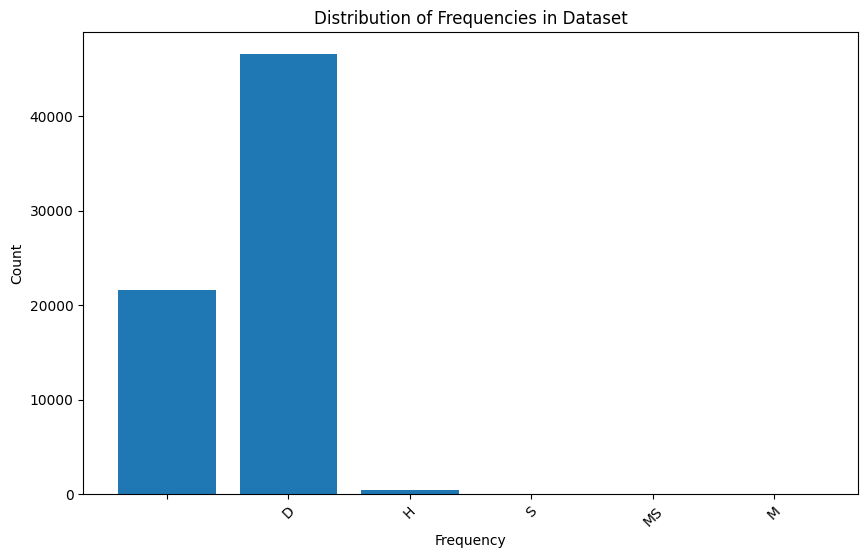

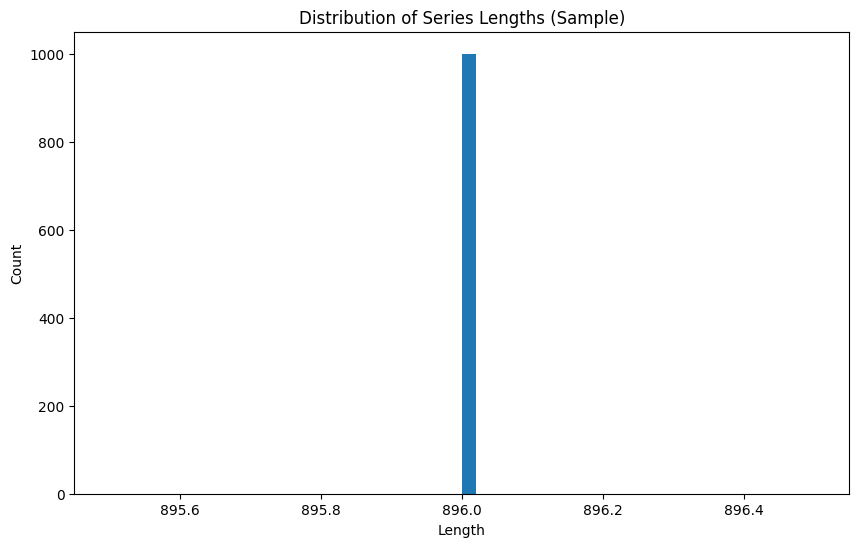

In [1]:
import polars as pl
import numpy as np
from datasets import load_dataset
from typing import Dict, List, Optional, Tuple, Any
from dataclasses import dataclass
from enum import Enum
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

@dataclass
class DomainInfo:
    total_series: int
    avg_length: int
    min_length: int
    max_length: int
    frequencies: List[str]

class UTSDAnalyzer:
    def __init__(self, cache_dir: Optional[str] = None):
        """Initialize the UTSD data analyzer."""
        self.dataset = None
        self.cache_dir = cache_dir
        
        # Initialize domain information from the provided summary
        self.domain_info = {
            'ERA5': DomainInfo(108, 116880, 116880, 116880, ['H']),
            'Health': DomainInfo(18865, 1448, 640, 4000, ['']),
            'Transport': DomainInfo(66, 47459, 576, 96424, ['H']),
            'Nature': DomainInfo(35013, 973, 725, 73924, ['', 'H', 'D']),
            'Environment': DomainInfo(20, 1005339, 407184, 3846408, ['', 'MS', 'S']),
            'Energy': DomainInfo(66, 96750, 10656, 3698573, ['S', 'M']),
            'Web': DomainInfo(14505, 803, 803, 803, ['D']),
            'IoT': DomainInfo(36, 180139, 180139, 180140, [''])
        }
        
        # Total expected series from summary
        self.expected_total_series = sum(info.total_series for info in self.domain_info.values())

    def load_dataset(self) -> None:
        """Load the UTSD-1G dataset and print its structure."""
        print("Loading dataset...")
        self.dataset = load_dataset("thuml/UTSD", 'UTSD-1G', cache_dir=self.cache_dir)
        print("Dataset loaded successfully")
        
        # Print dataset structure
        sample = self.dataset['train'][0]
        print("\nDataset structure:")
        for key, value in sample.items():
            if isinstance(value, list):
                print(f"{key}: List of length {len(value)}")
            else:
                print(f"{key}: {type(value)}")

    def analyze_dataset_structure(self) -> Dict[str, Any]:
        """Analyze the structure of the loaded dataset."""
        if self.dataset is None:
            self.load_dataset()
            
        total_series = len(self.dataset['train'])
        sample = self.dataset['train'][0]
        
        structure = {
            'total_series': total_series,
            'expected_series': self.expected_total_series,
            'fields': list(sample.keys()),
            'target_length': len(sample['target']),
            'frequencies': set(item['freq'] for item in self.dataset['train']),
            'date_range': {
                'start': min(item['start'] for item in self.dataset['train']),
                'end': max(item['end'] for item in self.dataset['train'])
            }
        }
        
        return structure

    def extract_features(self, series_data: List[float]) -> Dict[str, float]:
        """Extract statistical features from a time series."""
        series_array = np.array(series_data)
        return {
            'mean': float(np.mean(series_array)),
            'std': float(np.std(series_array)),
            'min': float(np.min(series_array)),
            'max': float(np.max(series_array)),
            'median': float(np.median(series_array)),
            'skew': float(stats.skew(series_array)),
            'kurtosis': float(stats.kurtosis(series_array)),
            'length': len(series_array)
        }

    def analyze_series_batch(self, batch_size: int = 1000) -> List[Dict[str, Any]]:
        """Analyze a batch of time series data."""
        if self.dataset is None:
            self.load_dataset()
            
        results = []
        
        for i, item in enumerate(self.dataset['train']):
            if i >= batch_size:
                break
                
            features = self.extract_features(item['target'])
            results.append({
                'item_id': item['item_id'],
                'frequency': item['freq'],
                'start': item['start'],
                'end': item['end'],
                'features': features
            })
            
        return results

    def plot_frequency_distribution(self):
        """Plot the distribution of frequencies in the dataset."""
        if self.dataset is None:
            self.load_dataset()
            
        freq_counts = {}
        for item in self.dataset['train']:
            freq = item['freq']
            freq_counts[freq] = freq_counts.get(freq, 0) + 1
            
        plt.figure(figsize=(10, 6))
        plt.bar(freq_counts.keys(), freq_counts.values())
        plt.title('Distribution of Frequencies in Dataset')
        plt.xlabel('Frequency')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        return plt.gcf()

    def plot_series_lengths(self, sample_size: int = 1000):
        """Plot distribution of series lengths from a sample."""
        if self.dataset is None:
            self.load_dataset()
            
        lengths = [len(item['target']) for item in list(self.dataset['train'])[:sample_size]]
        
        plt.figure(figsize=(10, 6))
        plt.hist(lengths, bins=50)
        plt.title('Distribution of Series Lengths (Sample)')
        plt.xlabel('Length')
        plt.ylabel('Count')
        return plt.gcf()

    def verify_domain_totals(self) -> bool:
        """Verify if the total number of series matches the domain summary."""
        if self.dataset is None:
            self.load_dataset()
            
        actual_total = len(self.dataset['train'])
        expected_total = self.expected_total_series
        
        match = actual_total == expected_total
        print(f"Expected total series: {expected_total}")
        print(f"Actual total series: {actual_total}")
        print(f"Totals match: {match}")
        
        return match

def create_analyzer(cache_dir: Optional[str] = None) -> UTSDAnalyzer:
    """Factory function to create a UTSDAnalyzer instance."""
    return UTSDAnalyzer(cache_dir=cache_dir)

# Usage example
if __name__ == "__main__":
    # Create analyzer
    analyzer = create_analyzer()
    
    # Analyze dataset structure
    structure = analyzer.analyze_dataset_structure()
    print("\nDataset Structure Analysis:")
    print(structure)
    
    # Verify domain totals
    totals_match = analyzer.verify_domain_totals()
    
    # Analyze a batch of series
    print("\nAnalyzing sample of series...")
    series_analysis = analyzer.analyze_series_batch(batch_size=5)
    for analysis in series_analysis:
        print(f"\nSeries {analysis['item_id']}:")
        print(f"Frequency: {analysis['frequency']}")
        print(f"Time range: {analysis['start']} to {analysis['end']}")
        print(f"Features: {analysis['features']}")
    
    # Create visualizations
    analyzer.plot_frequency_distribution()
    analyzer.plot_series_lengths()
    plt.show()

In [1]:
import polars as pl
import numpy as np
from datasets import load_dataset
from typing import Dict, List, Optional, Tuple, Any
from dataclasses import dataclass
import pyarrow.parquet as pq
import pyarrow as pa
from pathlib import Path
import os
from tqdm import tqdm

@dataclass
class DatasetConverter:
    """Handles conversion of UTSD dataset to Parquet format and provides efficient access."""
    cache_dir: Optional[str] = None
    parquet_dir: Optional[str] = None
    
    def __init__(self, cache_dir: Optional[str] = None, parquet_dir: Optional[str] = "parquet_data"):
        self.cache_dir = cache_dir
        self.parquet_dir = Path(parquet_dir)
        self.parquet_dir.mkdir(exist_ok=True)
        
    def convert_to_parquet(self) -> str:
        """Convert the HuggingFace dataset to Parquet format."""
        print("Loading dataset from HuggingFace...")
        dataset = load_dataset("thuml/UTSD", 'UTSD-1G', cache_dir=self.cache_dir)
        
        # Create paths for different parts of the data
        metadata_path = self.parquet_dir / "metadata.parquet"
        series_path = self.parquet_dir / "series.parquet"
        
        if metadata_path.exists() and series_path.exists():
            print("Parquet files already exist. Skipping conversion.")
            return str(self.parquet_dir)
            
        print("Converting to Parquet format...")
        
        # Create metadata DataFrame
        metadata_records = []
        series_records = []
        
        for idx, item in tqdm(enumerate(dataset['train']), desc="Converting data"):
            # Metadata record
            metadata_records.append({
                'item_id': item['item_id'],
                'start': item['start'],
                'end': item['end'],
                'freq': item['freq'],
                'length': len(item['target'])
            })
            
            # Series record - using multiple columns for the target values
            series_record = {'item_id': item['item_id']}
            series_record.update({f'value_{i}': v for i, v in enumerate(item['target'])})
            series_records.append(series_record)
            
            if (idx + 1) % 1000 == 0:
                print(f"Processed {idx + 1} records")
        
        # Convert to Polars DataFrames
        metadata_df = pl.DataFrame(metadata_records)
        series_df = pl.DataFrame(series_records)
        
        # Save as Parquet files
        print("Saving metadata to Parquet...")
        metadata_df.write_parquet(str(metadata_path))
        
        print("Saving series data to Parquet...")
        series_df.write_parquet(str(series_path))
        
        print(f"Conversion complete. Files saved in {self.parquet_dir}")
        return str(self.parquet_dir)

class ParquetDatasetAnalyzer:
    """Analyzes the UTSD dataset in Parquet format."""
    
    def __init__(self, parquet_dir: str):
        self.parquet_dir = Path(parquet_dir)
        self.metadata_path = self.parquet_dir / "metadata.parquet"
        self.series_path = self.parquet_dir / "series.parquet"
        
    def load_metadata(self) -> pl.DataFrame:
        """Load metadata from Parquet file."""
        return pl.scan_parquet(str(self.metadata_path))
    
    def load_series(self) -> pl.DataFrame:
        """Load series data from Parquet file."""
        return pl.scan_parquet(str(self.series_path))
    
    def analyze_frequencies(self) -> pl.DataFrame:
        """Analyze frequency distribution in the dataset."""
        return (
            self.load_metadata()
            .groupby('freq')
            .agg([
                pl.count().alias('count'),
                pl.mean('length').alias('avg_length'),
                pl.min('length').alias('min_length'),
                pl.max('length').alias('max_length')
            ])
            .collect()
        )
    
    def analyze_lengths(self) -> Dict[str, float]:
        """Analyze the distribution of series lengths."""
        stats = (
            self.load_metadata()
            .select([
                pl.col('length').mean().alias('mean_length'),
                pl.col('length').std().alias('std_length'),
                pl.col('length').min().alias('min_length'),
                pl.col('length').max().alias('max_length'),
                pl.col('length').median().alias('median_length')
            ])
            .collect()
        )
        return stats.to_dicts()[0]
    
    def get_sample_series(self, n: int = 5) -> pl.DataFrame:
        """Get a sample of n complete time series."""
        return (
            self.load_series()
            .join(self.load_metadata(), on='item_id')
            .limit(n)
            .collect()
        )

def analyze_dataset(parquet_dir: str):
    """Perform comprehensive analysis of the dataset."""
    analyzer = ParquetDatasetAnalyzer(parquet_dir)
    
    # Analyze frequencies
    print("\nFrequency Analysis:")
    freq_analysis = analyzer.analyze_frequencies()
    print(freq_analysis)
    
    # Analyze lengths
    print("\nLength Statistics:")
    length_stats = analyzer.analyze_lengths()
    print(length_stats)
    
    # Get sample series
    print("\nSample Series:")
    sample = analyzer.get_sample_series(5)
    print(sample)
    
    return {
        'frequency_analysis': freq_analysis,
        'length_statistics': length_stats,
        'sample_series': sample
    }

# Usage example
if __name__ == "__main__":
    # Convert dataset to Parquet format
    converter = DatasetConverter()
    parquet_dir = converter.convert_to_parquet()
    
    # Analyze the Parquet dataset
    results = analyze_dataset(parquet_dir)
    
    print("\nAnalysis complete. Results stored in 'results' dictionary.")

Loading dataset from HuggingFace...


Resolving data files:   0%|          | 0/320 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/80 [00:00<?, ?it/s]

Converting to Parquet format...


Converting data: 1552it [00:00, 1959.91it/s]

Processed 1000 records


Converting data: 2146it [00:01, 1869.03it/s]

Processed 2000 records


Converting data: 3325it [00:01, 1926.19it/s]

Processed 3000 records


Converting data: 4046it [00:03, 549.51it/s] 

Processed 4000 records


Converting data: 5083it [00:05, 497.93it/s]

Processed 5000 records


Converting data: 6351it [00:06, 1454.65it/s]

Processed 6000 records


Converting data: 7239it [00:07, 1685.78it/s]

Processed 7000 records


Converting data: 8356it [00:07, 1752.64it/s]

Processed 8000 records


Converting data: 9252it [00:08, 1668.65it/s]

Processed 9000 records


Converting data: 10347it [00:08, 1831.68it/s]

Processed 10000 records


Converting data: 11373it [00:09, 2023.90it/s]

Processed 11000 records


Converting data: 12407it [00:09, 2044.29it/s]

Processed 12000 records


Converting data: 13192it [00:10, 1902.94it/s]

Processed 13000 records


Converting data: 14204it [00:10, 1916.96it/s]

Processed 14000 records


Converting data: 15224it [00:11, 1438.16it/s]

Processed 15000 records


Converting data: 16199it [00:12, 1563.03it/s]

Processed 16000 records


Converting data: 17215it [00:12, 1617.17it/s]

Processed 17000 records


Converting data: 18145it [00:13, 1017.47it/s]

Processed 18000 records


Converting data: 19404it [00:18, 253.73it/s] 

Processed 19000 records


Converting data: 20627it [00:19, 1157.57it/s]

Processed 20000 records


Converting data: 21340it [00:19, 1704.69it/s]

Processed 21000 records


Converting data: 22588it [00:20, 2311.13it/s]

Processed 22000 records


Converting data: 23641it [00:20, 2522.46it/s]

Processed 23000 records


Converting data: 24420it [00:20, 2425.12it/s]

Processed 24000 records


Converting data: 25449it [00:21, 2508.84it/s]

Processed 25000 records


Converting data: 26443it [00:21, 2422.40it/s]

Processed 26000 records


Converting data: 27403it [00:22, 2307.89it/s]

Processed 27000 records


Converting data: 28341it [00:22, 2267.52it/s]

Processed 28000 records


Converting data: 29268it [00:22, 2254.51it/s]

Processed 29000 records


Converting data: 30490it [00:23, 2416.23it/s]

Processed 30000 records


Converting data: 31483it [00:23, 2440.34it/s]

Processed 31000 records


Converting data: 32510it [00:24, 2518.00it/s]

Processed 32000 records


Converting data: 33267it [00:24, 2439.62it/s]

Processed 33000 records


Converting data: 34367it [00:26, 877.97it/s] 

Processed 34000 records


Converting data: 35361it [00:26, 1559.57it/s]

Processed 35000 records


Converting data: 36457it [00:27, 2140.32it/s]

Processed 36000 records


Converting data: 37137it [00:27, 995.20it/s] 

Processed 37000 records


Converting data: 38425it [00:28, 1866.79it/s]

Processed 38000 records


Converting data: 39219it [00:28, 1724.59it/s]

Processed 39000 records


Converting data: 40354it [00:29, 2116.40it/s]

Processed 40000 records


Converting data: 41313it [00:29, 2310.56it/s]

Processed 41000 records


Converting data: 42524it [00:30, 2420.36it/s]

Processed 42000 records


Converting data: 43599it [00:30, 2629.34it/s]

Processed 43000 records


Converting data: 44382it [00:31, 2536.57it/s]

Processed 44000 records


Converting data: 45348it [00:31, 2164.52it/s]

Processed 45000 records


Converting data: 46246it [00:32, 2159.83it/s]

Processed 46000 records


Converting data: 47410it [00:32, 2102.48it/s]

Processed 47000 records


Converting data: 48512it [00:33, 2203.45it/s]

Processed 48000 records


Converting data: 49398it [00:33, 2103.07it/s]

Processed 49000 records


Converting data: 50215it [00:33, 1941.52it/s]

Processed 50000 records


Converting data: 51364it [00:34, 2196.39it/s]

Processed 51000 records


Converting data: 52245it [00:34, 2170.81it/s]

Processed 52000 records


Converting data: 53389it [00:35, 2200.55it/s]

Processed 53000 records


Converting data: 54367it [00:35, 2159.20it/s]

Processed 54000 records


Converting data: 55345it [00:36, 2393.80it/s]

Processed 55000 records


Converting data: 56313it [00:36, 2293.35it/s]

Processed 56000 records


Converting data: 57535it [00:37, 2444.47it/s]

Processed 57000 records


Converting data: 58324it [00:37, 2558.44it/s]

Processed 58000 records


Converting data: 59413it [00:37, 2634.28it/s]

Processed 59000 records


Converting data: 60521it [00:38, 2753.17it/s]

Processed 60000 records


Converting data: 61333it [00:38, 2579.48it/s]

Processed 61000 records


Converting data: 62385it [00:38, 2536.92it/s]

Processed 62000 records


Converting data: 63417it [00:39, 2522.43it/s]

Processed 63000 records


Converting data: 64475it [00:39, 2501.05it/s]

Processed 64000 records


Converting data: 65188it [00:40, 2243.53it/s]

Processed 65000 records


Converting data: 66302it [00:40, 2168.46it/s]

Processed 66000 records


Converting data: 67513it [00:41, 2426.16it/s]

Processed 67000 records


Converting data: 67999it [00:41, 2342.20it/s]

Processed 68000 records


Converting data: 68679it [01:23, 822.48it/s] 


Saving metadata to Parquet...
Saving series data to Parquet...
Conversion complete. Files saved in parquet_data

Frequency Analysis:


AttributeError: 'LazyFrame' object has no attribute 'groupby'

In [2]:
from pathlib import Path
import polars as pl
import numpy as np
from datasets import load_dataset
from typing import Dict, List, Optional, Tuple, Any
from datetime import datetime
import json
import shutil

class DataManager:
    """Manages local data storage and access for UTSD dataset."""
    
    def __init__(self, project_root: Optional[str] = None):
        """
        Initialize DataManager with project directory structure.
        
        Args:
            project_root: Root directory of the project. If None, uses current directory
        """
        self.project_root = Path(project_root) if project_root else Path.cwd()
        
        # Create directory structure
        self.data_dir = self.project_root / "data"
        self.raw_dir = self.data_dir / "raw"
        self.processed_dir = self.data_dir / "processed"
        self.metadata_dir = self.data_dir / "metadata"
        
        # Create directories if they don't exist
        for directory in [self.data_dir, self.raw_dir, self.processed_dir, self.metadata_dir]:
            directory.mkdir(exist_ok=True, parents=True)
            
        # Paths for raw data files
        self.raw_data_path = self.raw_dir / "utsd_raw.parquet"
        self.raw_metadata_path = self.metadata_dir / "dataset_info.json"

    def dataset_exists(self) -> bool:
        """Check if dataset already exists in local storage."""
        return self.raw_data_path.exists()

    def save_metadata(self, metadata: Dict) -> None:
        """Save dataset metadata including version and download date."""
        metadata.update({
            'download_date': datetime.now().isoformat(),
            'file_path': str(self.raw_data_path)
        })
        
        with open(self.raw_metadata_path, 'w') as f:
            json.dump(metadata, f, indent=2)

    def download_and_save(self, force: bool = False) -> None:
        """
        Download dataset from HuggingFace and save in Parquet format.
        
        Args:
            force: If True, redownload even if local copy exists
        """
        if self.dataset_exists() and not force:
            print("Dataset already exists locally. Use force=True to redownload.")
            return

        print("Downloading dataset from HuggingFace...")
        dataset = load_dataset("thuml/UTSD", 'UTSD-1G')
        
        print("Converting to Polars DataFrame...")
        records = []
        metadata = {
            'version': 'UTSD-1G',
            'n_series': len(dataset['train']),
            'columns': ['item_id', 'start', 'end', 'freq', 'target']
        }
        
        # Convert to records
        for item in dataset['train']:
            record = {
                'item_id': item['item_id'],
                'start': item['start'],
                'end': item['end'],
                'freq': item['freq'],
                'target': item['target']
            }
            records.append(record)
        
        # Convert to Polars DataFrame and save
        print("Saving to Parquet format...")
        df = pl.DataFrame(records)
        df.write_parquet(self.raw_data_path)
        
        # Save metadata
        self.save_metadata(metadata)
        print(f"Dataset saved to {self.raw_data_path}")

    def load_raw_data(self) -> pl.LazyFrame:
        """Load the raw dataset as a Polars LazyFrame."""
        if not self.dataset_exists():
            raise FileNotFoundError("Dataset not found locally. Run download_and_save() first.")
        
        return pl.scan_parquet(self.raw_data_path)

    def get_metadata(self) -> Dict:
        """Get dataset metadata."""
        if not self.raw_metadata_path.exists():
            raise FileNotFoundError("Metadata not found. Run download_and_save() first.")
            
        with open(self.raw_metadata_path, 'r') as f:
            return json.load(f)

    def clear_data(self, confirm: bool = False) -> None:
        """
        Clear all local data.
        
        Args:
            confirm: Must be True to actually delete data
        """
        if not confirm:
            print("Set confirm=True to actually delete data")
            return
            
        shutil.rmtree(self.data_dir)
        print("All local data cleared")

# Usage example
if __name__ == "__main__":
    # Initialize data manager
    data_manager = DataManager()
    
    # Download and save dataset if not already present
    data_manager.download_and_save()
    
    # Load data and show sample
    df = data_manager.load_raw_data()
    print("\nSample of raw data:")
    print(df.limit(5).collect())
    
    # Show metadata
    print("\nDataset metadata:")
    print(data_manager.get_metadata())

Resolving data files:   0%|          | 0/320 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/80 [00:00<?, ?it/s]

Converting to Polars DataFrame...
Saving to Parquet format...
Dataset saved to c:\Users\prite\Desktop\mlops-timeseries\notebooks\data\raw\utsd_raw.parquet

Sample of raw data:
shape: (5, 5)
┌─────────────────────────────────┬───────┬─────┬──────┬─────────────────────────────────┐
│ item_id                         ┆ start ┆ end ┆ freq ┆ target                          │
│ ---                             ┆ ---   ┆ --- ┆ ---  ┆ ---                             │
│ str                             ┆ str   ┆ str ┆ str  ┆ list[f64]                       │
╞═════════════════════════════════╪═══════╪═════╪══════╪═════════════════════════════════╡
│ Health_SelfRegulationSCP1_458_… ┆       ┆     ┆      ┆ [-8.12, -11.56, … -4.97]        │
│ Health_SelfRegulationSCP1_458_… ┆       ┆     ┆      ┆ [-20.09, -19.5, … -25.690001]   │
│ Health_SelfRegulationSCP1_458_… ┆       ┆     ┆      ┆ [-18.719999, -19.879999, … -25… │
│ Health_SelfRegulationSCP1_458_… ┆       ┆     ┆      ┆ [-16.41, -17.379999, … -2